In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
from pandas import util

In [10]:
#Đọc bảng ra dataframe
filename = 'sales_data.xlsx'
df = pd.read_excel(filename)
df

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,4.600000,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,11.201000,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,3.115000,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,2.620000,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,...,16.000000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,FA-2015-30771,2015-01-21,2015-01-27,6,Standard Class,Fashion,Sports Wear,85,5,0.04,...,1.700000,Medium,IN-0040977,Welch Fein,Corporate,Pasadena,Texas,United States,Central,Jan
51286,FA-2015-30772,2015-06-22,2015-06-24,2,Standard Class,Fashion,Sports Wear,85,1,0.03,...,0.245000,Medium,TT-0040978,Martinez Arnett,Corporate,Harare,Harare,Zimbabwe,Africa,Jun
51287,FA-2015-30773,2015-01-01,2015-01-07,6,Standard Class,Fashion,Sports Wear,85,1,0.05,...,0.075000,Medium,ON-0040979,Mccoy Duston,Home Office,Townsville,Queensland,Australia,Oceania,Jan
51288,FA-2015-30774,2015-12-07,2015-12-14,7,Standard Class,Fashion,Sports Wear,85,3,0.04,...,2.833333,Medium,RN-0040980,Bentley Zypern,Consumer,Houston,Texas,United States,Central,Dec


In [11]:
#Thông tin bảng
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51290 non-null  object        
 1   Order Date        51290 non-null  datetime64[ns]
 2   Ship Date         51290 non-null  datetime64[ns]
 3   Aging             51290 non-null  int64         
 4   Ship Mode         51290 non-null  object        
 5   Product Category  51290 non-null  object        
 6   Product           51290 non-null  object        
 7   Sales             51290 non-null  int64         
 8   Quantity          51290 non-null  int64         
 9   Discount          51290 non-null  float64       
 10  Profit            51290 non-null  float64       
 11  Shipping Cost     51290 non-null  float64       
 12  Order Priority    51290 non-null  object        
 13  Customer ID       51290 non-null  object        
 14  Customer Name     5129

In [12]:
#xem xét các đối tượng để phân tích doanh thu

print(set(df['Product Category']))
#print(set(df['Product']))
print(set(df['Order Priority']))
print(set(df['Segment']))
#print(set(df['City']))
#print(set(df['State']))
#print(set(df['Country']))
print(set(df['Months']))
print(set(df['Ship Mode']))
print(set(df['Aging']))
print(set(df['Region']))

{'Home & Furniture', 'Electronic', 'Fashion', 'Auto & Accessories'}
{'Medium', 'Critical', 'High', 'Low'}
{'Home Office', 'Consumer', 'Corporate'}
{'Jan', 'Feb', 'Apr', 'May', 'Dec', 'Oct', 'Jun', 'Sep', 'Aug', 'Nov', 'Jul', 'Mar'}
{'Second Class', 'Same Day', 'First Class', 'Standard Class'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{'Oceania', 'Southeast Asia', 'Canada', 'West', 'East', 'Central', 'Central Asia', 'Africa', 'South', 'North', 'Caribbean', 'North Asia', 'EMEA'}


In [13]:
#Thêm cột tháng bằng số
df['Number_of_Month'] = df['Order Date'].dt.month
df

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months,Number_of_Month
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,11
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,6
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,12
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,5
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,FA-2015-30771,2015-01-21,2015-01-27,6,Standard Class,Fashion,Sports Wear,85,5,0.04,...,Medium,IN-0040977,Welch Fein,Corporate,Pasadena,Texas,United States,Central,Jan,1
51286,FA-2015-30772,2015-06-22,2015-06-24,2,Standard Class,Fashion,Sports Wear,85,1,0.03,...,Medium,TT-0040978,Martinez Arnett,Corporate,Harare,Harare,Zimbabwe,Africa,Jun,6
51287,FA-2015-30773,2015-01-01,2015-01-07,6,Standard Class,Fashion,Sports Wear,85,1,0.05,...,Medium,ON-0040979,Mccoy Duston,Home Office,Townsville,Queensland,Australia,Oceania,Jan,1
51288,FA-2015-30774,2015-12-07,2015-12-14,7,Standard Class,Fashion,Sports Wear,85,3,0.04,...,Medium,RN-0040980,Bentley Zypern,Consumer,Houston,Texas,United States,Central,Dec,12


1. Tổng quan


In [15]:
sum_sale = df['Sales'].sum()
sum_profit = df['Profit'].sum()
sum_discount = df['Discount'].sum()
sum_quantity = df['Quantity'].sum()
sum_order = df['Order ID'].count()
ship = df['Shipping Cost'].sum()

print('Tổng doanh thu:',sum_sale)
print('Tổng lợi nhuận:',round(sum_profit,2))
print('Tổng giảm giá:',round(sum_discount,2))
print('Tổng số sản phẩn bán được:',sum_quantity)
print('Tổng số đơn hàng:',sum_order)
print('Tổng phí ship:',ship)


Tổng doanh thu: 8023381
Tổng lợi nhuận: 3729902.95
Tổng giảm giá: 1537.22
Tổng số sản phẩn bán được: 153732
Tổng số đơn hàng: 51290
Tổng phí ship: 372990.295


2. Theo loại hàng

In [16]:
sale1 = df.groupby('Product Category').sum()['Sales']
profit1 = df.groupby('Product Category').sum()['Profit'].round(2)
quantity1 = df.groupby('Product Category')['Quantity'].count()
print(sale1)
print(profit1)
print(quantity1)


Product Category
Auto & Accessories    1097139
Electronic             394738
Fashion               5212097
Home & Furniture      1319407
Name: Sales, dtype: int64
Product Category
Auto & Accessories     484277.63
Electronic             174175.04
Fashion               2483852.63
Home & Furniture       587597.65
Name: Profit, dtype: float64
Product Category
Auto & Accessories     7505
Electronic             2701
Fashion               30775
Home & Furniture      10309
Name: Quantity, dtype: int64


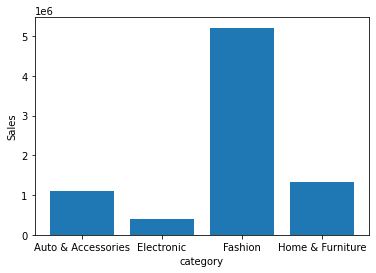

Loại có doanh thu cao nhất là: Fashion
Với doanh thu: 5212097


In [17]:
#Doanh thu 
category = df['Product Category'].sort_values().unique()
plt.xlabel('category')
plt.ylabel('Sales')
plt.bar(x = category, height = sale1)
plt.show()

#Loại hàng có doanh thu cao nhất
print('Loại có doanh thu cao nhất là:',sale1.idxmax())
print('Với doanh thu:',sale1.max())

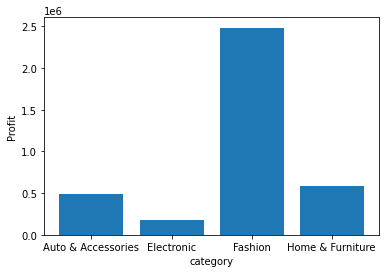

Loại hàng có lợi nhuận cao nhất là: Fashion
Với lợi nhuận: 2483852.63


In [18]:
#Lợi nhuận
plt.xlabel('category')
plt.ylabel('Profit')
plt.bar(x = category, height = profit1)
plt.show()

#Loại hàng có doanh thu cao nhất
print('Loại hàng có lợi nhuận cao nhất là:',profit1.idxmax())
print('Với lợi nhuận:',profit1.max())

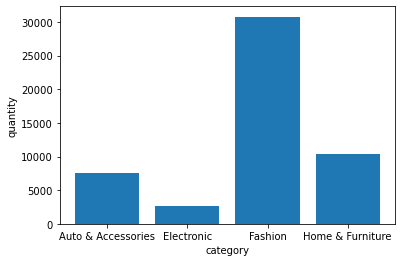

loại hàng có số lượng bán cao nhất là: Fashion
Với số lượng: 30775


In [19]:
#Số lượng
plt.xlabel('category')
plt.ylabel('quantity')
plt.bar(x = category, height = quantity1)
plt.show()

#Loại hàng có số lượng cao nhất
print('loại hàng có số lượng bán cao nhất là:',quantity1.idxmax())
print('Với số lượng:',quantity1.max())

3. Theo phân khúc khách hàng

In [20]:
sale2 = df.groupby('Segment').sum()['Sales']
profit2 = df.groupby('Segment').sum()['Profit'].round(2)
print(sale2)
print(profit2)

Segment
Consumer       4135221
Corporate      2421560
Home Office    1466600
Name: Sales, dtype: int64
Segment
Consumer       1915711.97
Corporate      1128762.70
Home Office     685428.28
Name: Profit, dtype: float64


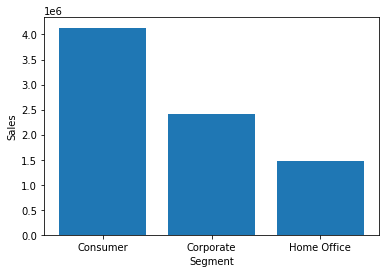

Loại hàng cho doanh thu cao nhất là: Consumer
Với doanh thu: 4135221


In [21]:
#Doanh thu 
segment = df['Segment'].sort_values().unique()
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.bar(x = segment, height = sale2)
plt.show()

#Loại khách hàng cho doanh thu cao nhất
print('Loại hàng cho doanh thu cao nhất là:',sale2.idxmax())
print('Với doanh thu:',sale2.max())

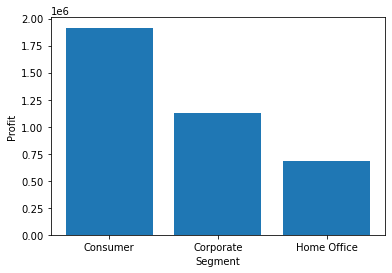

Loại khách hàng cho lợi nhuận cao nhất là: Consumer
Với lợi nhuận: 1915711.97


In [22]:
#Lợi nhuận
segment = df['Segment'].sort_values().unique()
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.bar(x = segment, height = profit2)
plt.show()

#Loại khách hàng cho lợi nhuận cao nhất
print('Loại khách hàng cho lợi nhuận cao nhất là:',profit2.idxmax())
print('Với lợi nhuận:',profit2.max())

4. Theo tháng

In [23]:
sale3 = df.groupby('Number_of_Month').sum()['Sales']
profit3 = df.groupby('Number_of_Month').sum()['Profit'].round(2)
print(sale3)
print(profit3)

Number_of_Month
1     676313
2     610240
3     686681
4     659404
5     672547
6     664560
7     685152
8     670788
9     658844
10    689116
11    656663
12    693073
Name: Sales, dtype: int64
Number_of_Month
1     313566.35
2     286102.62
3     317186.01
4     308364.51
5     313751.25
6     307585.02
7     318703.20
8     310442.84
9     305334.46
10    320748.67
11    304716.10
12    323401.92
Name: Profit, dtype: float64


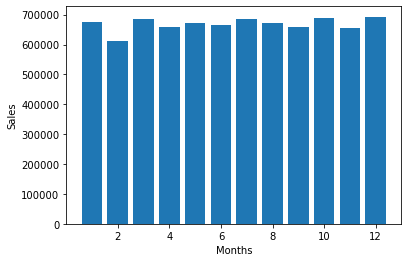

Tháng có doanh thu cao nhất là: 12
Với doanh thu: 693073


In [24]:
#Doanh thu 
month = df['Number_of_Month'].sort_values().unique()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.bar(x = month, height = sale3)
plt.show()

#Tháng có doanh thu cao nhất
print('Tháng có doanh thu cao nhất là:',sale3.idxmax())
print('Với doanh thu:',sale3.max())

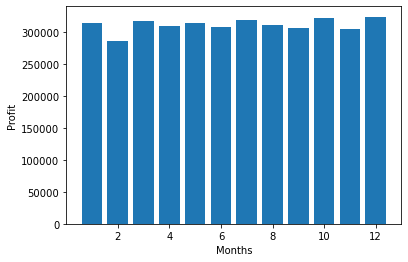

Tháng có lợi nhuận cao nhất là: 12
Với lợi nhuận: 323401.92


In [25]:
#Lợi nhuận
month = df['Number_of_Month'].sort_values().unique()
plt.xlabel('Months')
plt.ylabel('Profit')
plt.bar(x = month, height = profit3)
plt.show()

#Tháng có lợi nhuận cao nhất
print('Tháng có lợi nhuận cao nhất là:',profit3.idxmax())
print('Với lợi nhuận:',profit3.max())

5. Theo khu vực

In [26]:
sale4 = df.groupby('Region').sum()['Sales']
profit4 = df.groupby('Region').sum()['Profit'].round(2)
print(sale4)
print(profit4)

Region
Africa             713074
Canada              60003
Caribbean          260495
Central           1735900
Central Asia       321005
EMEA               788072
East               446468
North              750482
North Asia         369816
Oceania            544827
South             1034884
Southeast Asia     500923
West               497432
Name: Sales, dtype: int64
Region
Africa            332206.83
Canada             27782.31
Caribbean         120602.70
Central           804172.61
Central Asia      149526.03
EMEA              368553.72
East              206683.03
North             349285.21
North Asia        170911.36
Oceania           253680.81
South             479146.82
Southeast Asia    235587.85
West              231763.69
Name: Profit, dtype: float64


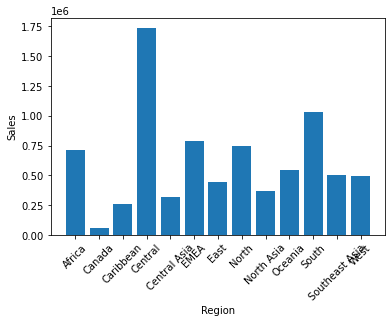

Khu vực có doanh thu cao nhất là: Central
Với doanh thu: 1735900


In [27]:
#Doanh thu 
region = df['Region'].sort_values().unique()
plt.xlabel('Region')
plt.ylabel('Sales')
plt.bar(x = region, height = sale4)
plt.xticks(rotation=45)
#plt.rcParams["figure.figsize"] = (10,3)
plt.show()

#Khu vực có doanh thu cao nhất
print('Khu vực có doanh thu cao nhất là:',sale4.idxmax())
print('Với doanh thu:',sale4.max())

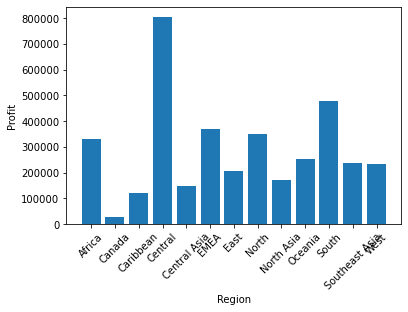

Khu vực có lợi nhuận cao nhất là: Central
Với lợi nhuận: 804172.61


In [28]:
#Lợi nhuận
region = df['Region'].sort_values().unique()
plt.xlabel('Region')
plt.ylabel('Profit')
plt.bar(x = region, height = profit4)
plt.xticks(rotation=45)
#plt.rcParams["figure.figsize"] = (10,3)
plt.show()

#Khu vực có lợi nhuận cao nhất
print('Khu vực có lợi nhuận cao nhất là:',profit4.idxmax())
print('Với lợi nhuận:',profit4.max())

6. Theo số ngày xử lý

In [29]:
count_aging = df.groupby('Aging')['Order ID'].count()
mean_aging = round(df['Aging'].mean())
std_aging = round(df['Aging'].std())
priority_aging = df.groupby('Order Priority')['Aging'].mean().round(2)
region_aging = df.groupby('Region')['Aging'].mean().round(2)
print(count_aging)
print(priority_aging)
print(region_aging)


Aging
1     7467
2     4815
3     5017
4     4875
5     4939
6     4892
7     4900
8     4820
9     4674
10    4891
Name: Order ID, dtype: int64
Order Priority
Critical    4.71
High        5.15
Low         5.45
Medium      5.37
Name: Aging, dtype: float64
Region
Africa            5.28
Canada            5.05
Caribbean         5.17
Central           5.24
Central Asia      5.40
EMEA              5.26
East              5.34
North             5.20
North Asia        5.23
Oceania           5.24
South             5.27
Southeast Asia    5.27
West              5.25
Name: Aging, dtype: float64


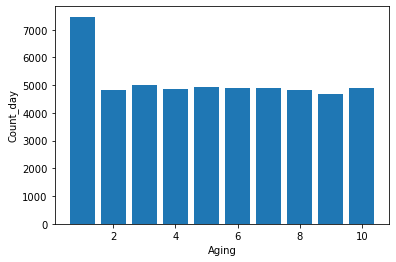

Số ngày xử lý đơn hàng: 5 +- 3


In [30]:
#Số đơn hàng theo thời gian xử lý
aging = df['Aging'].sort_values().unique()
plt.xlabel('Aging')
plt.ylabel('Count_day')
plt.bar(x = aging, height = count_aging)
plt.show()
print('Số ngày xử lý đơn hàng:',mean_aging,'+-',std_aging)

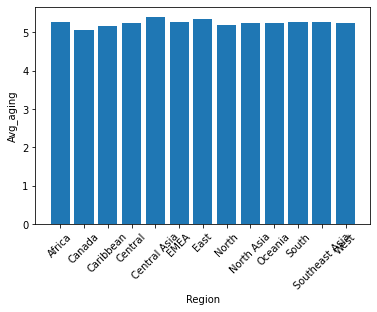

In [31]:
#Thời gian xử lý trung bình từng khu vực
plt.xlabel('Region')
plt.ylabel('Avg_aging')
plt.bar(x = region, height = region_aging)
plt.xticks(rotation=45)
#plt.rcParams["figure.figsize"] = (10,3)
plt.show()

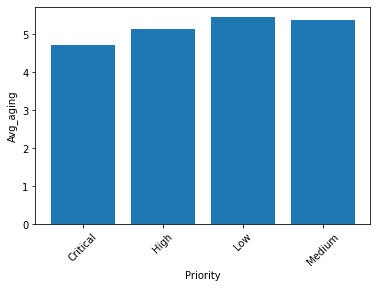

In [32]:
#Thời gian xử lý trung bình theo thứ tự ưu tiên
priority = df['Order Priority'].sort_values().unique()
plt.xlabel('Priority')
plt.ylabel('Avg_aging')
plt.bar(x = priority, height = priority_aging)
plt.xticks(rotation=45)
#plt.rcParams["figure.figsize"] = (10,3)
plt.show()

7. Phí ship

In [33]:
region_ship = df.groupby('Region')['Shipping Cost'].sum().round(2)
print(region_ship)

Region
Africa            33220.68
Canada             2778.23
Caribbean         12060.27
Central           80417.26
Central Asia      14952.60
EMEA              36855.37
East              20668.30
North             34928.52
North Asia        17091.14
Oceania           25368.08
South             47914.68
Southeast Asia    23558.78
West              23176.37
Name: Shipping Cost, dtype: float64


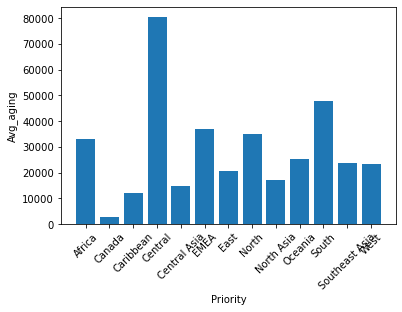

In [34]:
#Tổng phí ship đến từng khu vực
plt.xlabel('Priority')
plt.ylabel('Avg_aging')
plt.bar(x = region, height = region_ship)
plt.xticks(rotation=45)
#plt.rcParams["figure.figsize"] = (10,3)
plt.show()